<a href="https://colab.research.google.com/github/PDeySarkar103/ML_Astrophysics/blob/main/Star_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# Importing Data files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 6 class csv.csv to 6 class csv (1).csv


In [ ]:
df=pd.read_csv('6_class.csv')

In [ ]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Data visualization

In [ ]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [ ]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

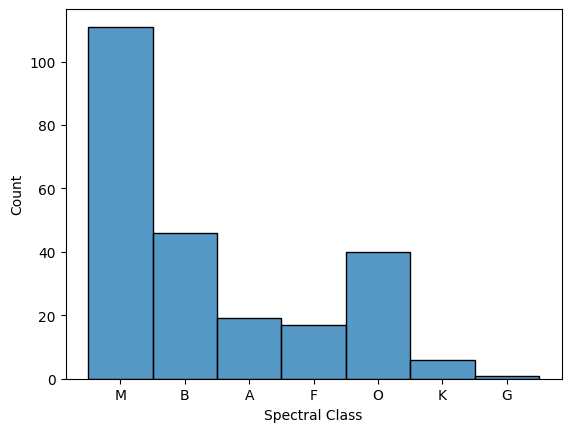

In [ ]:
sns.histplot(x=df['Spectral Class'])
plt.show()

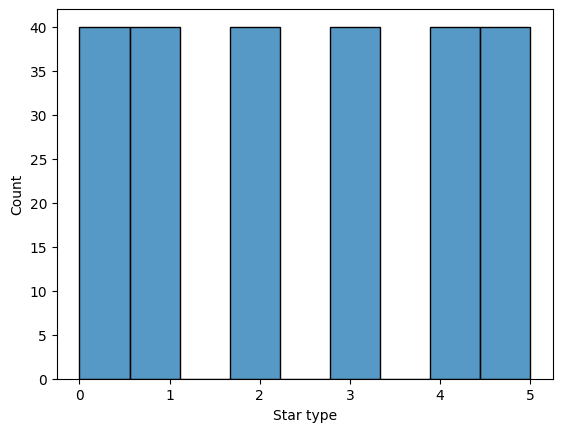

In [ ]:
sns.histplot(x=df['Star type'])
plt.show()

In [ ]:
# star class:  Star Type
#     0     :  Brown Dwarf
#     1     :  Red Dwarf
#     2     :  White Dwarf
#     3     :  Main-Sequence
#     4     :  Supergiant
#     5     :  Hypergiant


<Axes: >

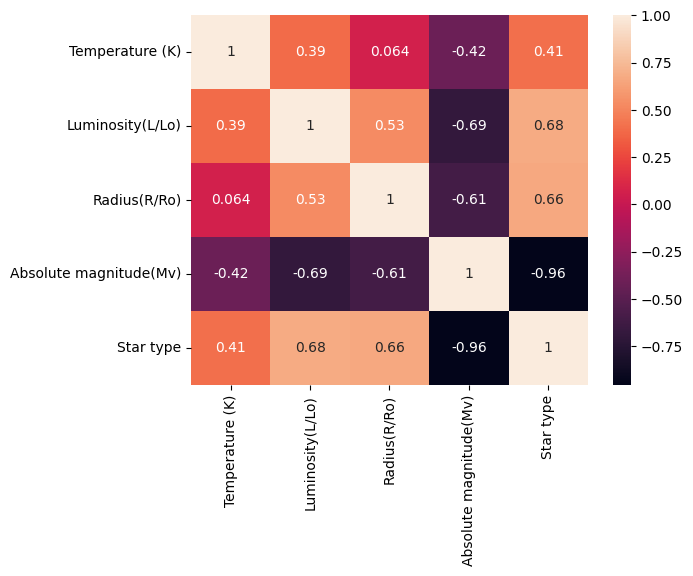

In [ ]:
# Heatmap for expressing correlation

#plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

# Classification using Star Type

## Selecting X and Y values

In [ ]:
Xst=df[[ 	'Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)' ,	'Absolute magnitude(Mv)']]
Xst

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [ ]:
yst=df[['Star type']]
yst

,Star type
0,0
1,0
2,0
3,0
4,0
...,...
235,5
236,5
237,5
238,5


In [ ]:
yst.value_counts()

Star type
0            40
1            40
2            40
3            40
4            40
5            40
dtype: int64

## Spliiting into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
xst_train, xst_test, yst_train, yst_test= train_test_split(Xst,yst,test_size=0.25,random_state=210)

In [ ]:
yst_test

## Encoding

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(yst_train)
l_encode.fit(yst_test)
Yst_train=l_encode.transform(yst_train)
######################################################
y_train=Yst_train #Required for future
######################################################
Yst_train=to_categorical(Yst_train)
Yst_test=l_encode.transform(yst_test)
Yst_test=to_categorical(yst_test)

In [ ]:
#from sklearn.model_selection import train_test_split
#Xst_train, Xst_test, yst_train, yst_test= train_test_split(Xst,Yst,test_size=0.25,random_state=210)

In [ ]:
xst_train.shape,xst_test.shape,Yst_train.shape,Yst_test.shape

((180, 4), (60, 4), (180, 6), (60, 6))

In [ ]:
Yst_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
Yst_test

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [ ]:
Xst_test

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
238,9235,404940.000000,1112.00000,-11.230
145,8924,0.000280,0.00879,14.870
125,3225,0.000760,0.12100,19.630
148,7723,0.000140,0.00878,14.810
119,3780,200000.000000,1324.00000,-10.700
178,12100,120000.000000,708.90000,-7.840
106,24630,363000.000000,63.00000,-5.830
99,36108,198000.000000,10.20000,-4.400
144,11900,0.000670,0.00898,11.380
171,3500,138000.000000,1420.00000,-8.180


## ANN

In [ ]:
import tensorflow as tf

<Axes: >

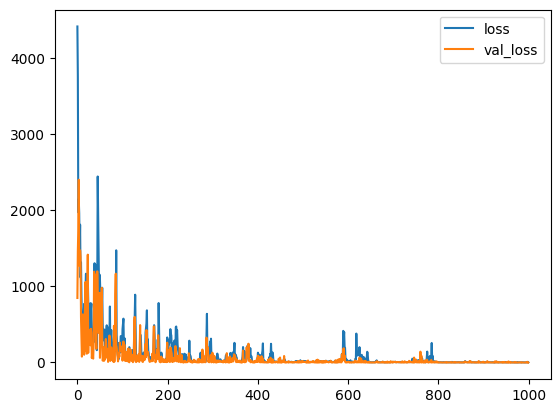

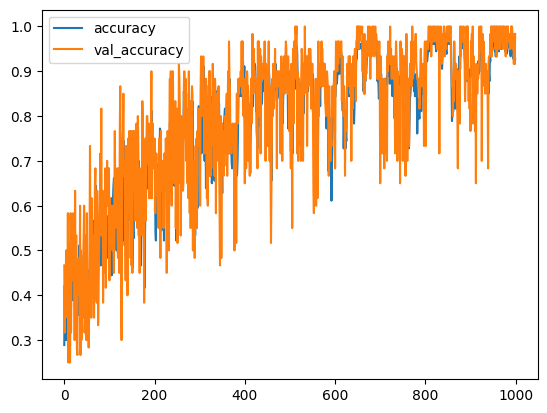

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(200,input_dim=Xst_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(300,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax'),
    ])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xst_train,Yst_train,validation_data=(Xst_test,Yst_test),epochs=1000,verbose=0)

model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [ ]:
y_pred=np.round(model.predict(Xst_test))

2/2 [==============================] - 0s 9ms/step


In [ ]:
from sklearn.metrics import recall_score

ann_score=recall_score(Yst_test,y_pred,average='weighted')
ann_score

0.9833333333333333

In [ ]:
y_pred.shape

(60, 6)

In [ ]:
y_pred

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

Text(50.722222222222214, 0.5, 'Prediction')

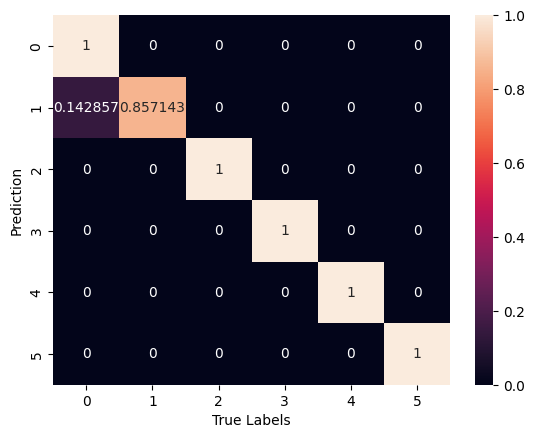

In [ ]:
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(Yst_test.argmax(axis=1),y_pred.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g')
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Classification using Spectral class

## Feature Selection

In [ ]:
Xsc=df[[ 	'Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)' ,	'Absolute magnitude(Mv)']]
Xsc

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [ ]:
ysc=df[['Spectral Class']]
ysc

,Spectral Class
0,M
1,M
2,M
3,M
4,M
...,...
235,O
236,O
237,A
238,A


In [ ]:
ysc.value_counts()

Spectral Class
M                 111
B                  46
O                  40
A                  19
F                  17
K                   6
G                   1
dtype: int64

## Data preprocessing

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(ysc)
Ysc=l_encode.transform(ysc)
Ysc=to_categorical(Ysc)

In [ ]:
from sklearn.model_selection import train_test_split
Xsc_train, Xsc_test, ysc_train, ysc_test= train_test_split(Xsc,Ysc,test_size=0.25,random_state=210)

In [ ]:
Xsc_train.shape,Xsc_test.shape,ysc_train.shape,ysc_test.shape

((180, 4), (60, 4), (180, 7), (60, 7))

In [ ]:
ysc_test

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

## ANN

In [ ]:
import tensorflow as tf

<Axes: >

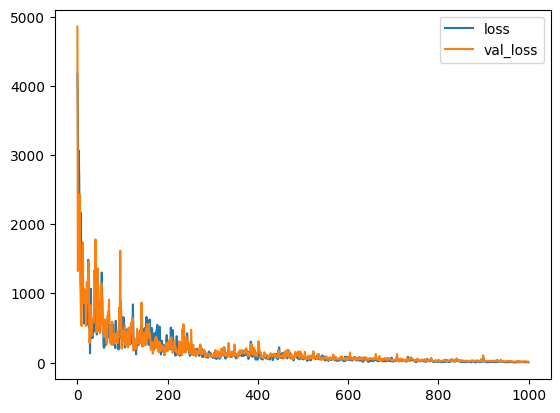

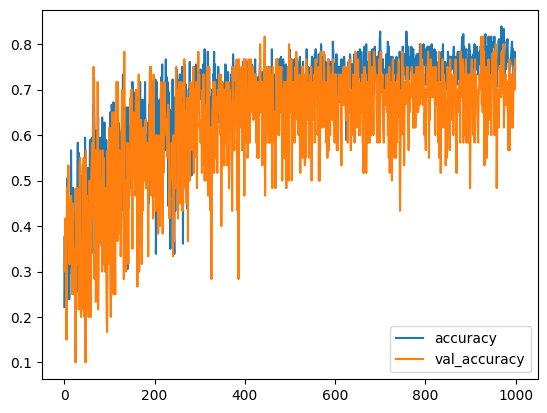

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(200,input_dim=Xsc_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(300,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax'),
    ])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xsc_train,ysc_train,validation_data=(Xsc_test,ysc_test),epochs=1000,verbose=0)

model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 200)               1000      
                                                                 
 dense_28 (Dense)            (None, 300)               60300     
                                                                 
 dense_29 (Dense)            (None, 7)                 2107      
                                                                 
Total params: 63407 (247.68 KB)
Trainable params: 63407 (247.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred2=np.round(model.predict(Xsc_test))

2/2 [==============================] - 0s 4ms/step


In [ ]:
y_pred2

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

Text(50.722222222222214, 0.5, 'Prediction')

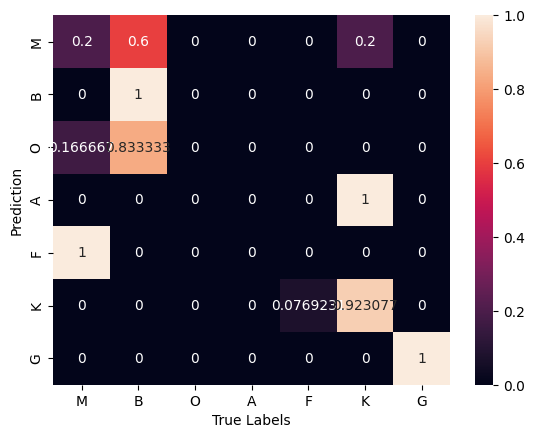

In [ ]:
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(ysc_test.argmax(axis=1),y_pred2.argmax(axis=1),normalize='true')

#sns.heatmap(cm_ann,annot=True,fmt='g')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['M','B','O','A','F','K','G'],yticklabels=['M','B','O','A','F','K','G'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

***One of the possible errors here may be that the no. of input parameters is less than that in input parameters***

# H-R Diagrams

## Original Dataset

In [ ]:
x1 = np.array(df1.drop(['Star color','Spectral Class'],1))
y1 = np.array(df1['Star type'], dtype ='float')

In [ ]:
x1

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01,
         0.00000e+00],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01,
         0.00000e+00],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01,
         0.00000e+00],
       ...,
       [ 8.82900e+03,  5.37493e+05,  1.42300e+03, -1.07300e+01,
         5.00000e+00],
       [ 9.23500e+03,  4.04940e+05,  1.11200e+03, -1.12300e+01,
         5.00000e+00],
       [ 3.78820e+04,  2.94903e+05,  1.78300e+03, -7.80000e+00,
         5.00000e+00]])

In [ ]:
y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4.,
       4., 4., 4., 4., 4.

Total Counted Stars = 240


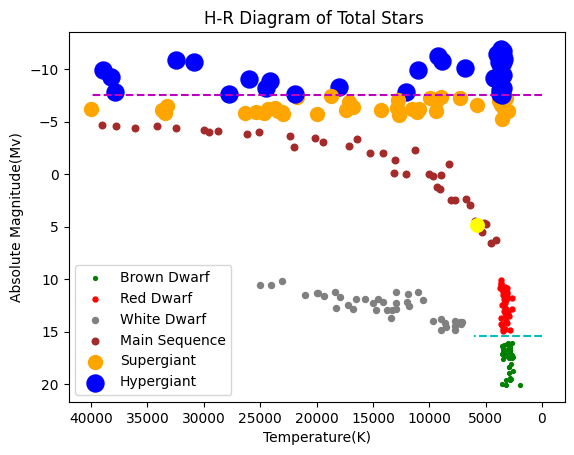

In [ ]:
df1 = pd.read_csv('6_class.csv')



x1 = np.array(df1.drop(['Star color','Spectral Class'],1))
y1 = np.array(df1['Star type'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    if x1[i][4] == 0:
        a = plt.scatter(x1[i][0],x1[i][3], s = 30 , c = 'green', marker = '.')
    elif x1[i][4]== 1:
        b = plt.scatter(x1[i][0],x1[i][3],s = 50 , c = 'red',marker = '.')
    elif x1[i][4]== 2:
        c = plt.scatter(x1[i][0],x1[i][3],s = 75 , c = 'gray',marker = '.')
    elif x1[i][4]== 3:
        d = plt.scatter(x1[i][0],x1[i][3],s = 90 , c = 'brown',marker = '.')
    elif x1[i][4]== 4:
        e = plt.scatter(x1[i][0],x1[i][3],s = 100 , c = 'orange',marker = 'o')
    elif x1[i][4]== 5:
        f = plt.scatter(x1[i][0],x1[i][3],s = 150 , c = 'blue',marker = 'o')


    c1+=1


print("Total Counted Stars = {}".format(c1))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Total Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.scatter(5778,4.83,s = 95, c= 'yellow',marker = 'o',label='Sun' )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
x1

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01,
         0.00000e+00],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01,
         0.00000e+00],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01,
         0.00000e+00],
       ...,
       [ 8.82900e+03,  5.37493e+05,  1.42300e+03, -1.07300e+01,
         5.00000e+00],
       [ 9.23500e+03,  4.04940e+05,  1.11200e+03, -1.12300e+01,
         5.00000e+00],
       [ 3.78820e+04,  2.94903e+05,  1.78300e+03, -7.80000e+00,
         5.00000e+00]])

## Trained Dataset

In [ ]:
y_train=np.array(l_encode.transform(yst_train))
x_train=np.array(Xst_train)

In [ ]:
y_train

array([2, 5, 1, 2, 5, 4, 3, 4, 3, 3, 2, 5, 3, 4, 1, 0, 2, 4, 5, 5, 5, 0,
       1, 0, 5, 5, 0, 4, 4, 5, 0, 0, 1, 4, 4, 0, 1, 1, 1, 4, 4, 3, 5, 0,
       3, 1, 5, 5, 4, 2, 1, 1, 3, 2, 2, 0, 0, 3, 2, 3, 2, 0, 0, 0, 1, 5,
       4, 0, 0, 2, 2, 2, 4, 4, 1, 3, 3, 5, 3, 2, 3, 2, 2, 4, 0, 3, 3, 0,
       1, 2, 4, 1, 4, 3, 5, 0, 1, 0, 1, 5, 3, 3, 0, 4, 5, 1, 1, 2, 0, 4,
       3, 4, 4, 3, 4, 1, 2, 2, 1, 0, 4, 4, 0, 5, 1, 5, 5, 5, 2, 1, 5, 2,
       3, 0, 3, 0, 1, 5, 2, 4, 1, 5, 1, 4, 3, 2, 1, 0, 3, 0, 3, 5, 0, 4,
       2, 1, 5, 0, 3, 4, 3, 1, 4, 3, 0, 3, 4, 5, 4, 5, 3, 0, 1, 1, 4, 1,
       1, 5, 4, 1])

Total Trained Stars = 180


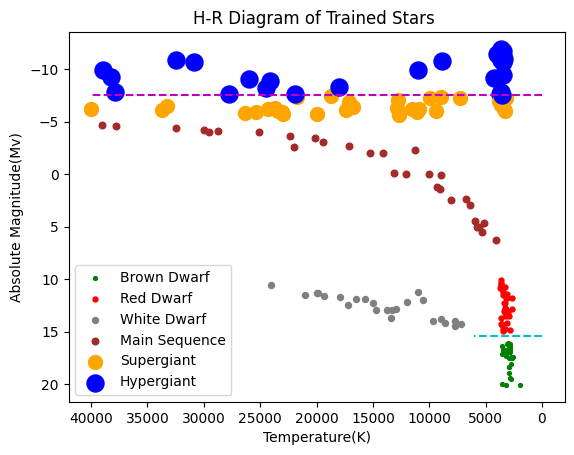

In [ ]:
c2=0

#y_train=np.array(yst_train)
y_train=np.array(l_encode.transform(yst_train))
x_train=np.array(Xst_train)
#x_train=np.array(Xst_train)
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        a = plt.scatter(x_train[i][0],x_train[i][3], s = 30 , c = 'green', marker = '.')
    elif y_train[i]== 1:
        b = plt.scatter(x_train[i][0],x_train[i][3],s = 50 , c = 'red',marker = '.')
    elif y_train[i]== 2:
        c = plt.scatter(x_train[i][0],x_train[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_train[i]== 3:
        d = plt.scatter(x_train[i][0],x_train[i][3],s = 90 , c = 'brown',marker = '.')
    elif y_train[i]== 4:
        e = plt.scatter(x_train[i][0],x_train[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_train[i]== 5:
        f = plt.scatter(x_train[i][0],x_train[i][3],s = 150 , c = 'blue',marker = 'o')
    c2+=1


print("Total Trained Stars = {}".format(c2))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Trained Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()


## Tested Dataset

Total Tested Stars = 60


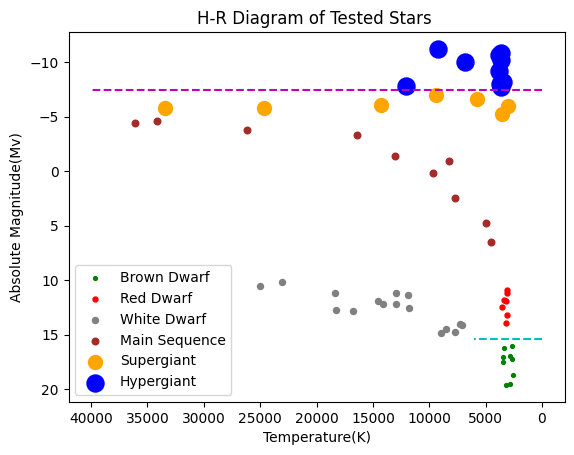

In [ ]:
c3=0

y_test=np.array(l_encode.transform(yst_test))
x_test=np.array(xst_test)

for i in range(0,len(y_test)):
    if y_test[i] == 0:
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif y_test[i]== 1:
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif y_test[i]== 2:
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_test[i]== 3:
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 90 , c = 'brown',marker = '.')
    elif y_test[i]== 4:
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_test[i]== 5:
        f = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')
    c3+=1


print("Total Tested Stars = {}".format(c3))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Tested Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()


## Predicted Dataset

In [ ]:
y_p=np.array(y_pred)
x_test=np.array(Xst_test)

In [ ]:
y_p.shape

(60, 6)

In [ ]:
z=y_p

In [ ]:
z

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [ ]:
z_1=np.where(y_p==1)[1]
z_1

array([5, 2, 0, 2, 5, 5, 4, 3, 2, 5, 2, 5, 0, 2, 2, 4, 5, 1, 2, 2, 2, 1,
       0, 2, 5, 3, 4, 2, 0, 3, 3, 5, 0, 5, 0, 4, 2, 4, 4, 3, 0, 0, 3, 3,
       2, 4, 2, 2, 1, 3, 1, 3, 1, 0, 5, 0, 5, 3, 1, 2])

In [ ]:
x_test

array([[ 9.2350e+03,  4.0494e+05,  1.1120e+03, -1.1230e+01],
       [ 8.9240e+03,  2.8000e-04,  8.7900e-03,  1.4870e+01],
       [ 3.2250e+03,  7.6000e-04,  1.2100e-01,  1.9630e+01],
       [ 7.7230e+03,  1.4000e-04,  8.7800e-03,  1.4810e+01],
       [ 3.7800e+03,  2.0000e+05,  1.3240e+03, -1.0700e+01],
       [ 1.2100e+04,  1.2000e+05,  7.0890e+02, -7.8400e+00],
       [ 2.4630e+04,  3.6300e+05,  6.3000e+01, -5.8300e+00],
       [ 3.6108e+04,  1.9800e+05,  1.0200e+01, -4.4000e+00],
       [ 1.1900e+04,  6.7000e-04,  8.9800e-03,  1.1380e+01],
       [ 3.5000e+03,  1.3800e+05,  1.4200e+03, -8.1800e+00],
       [ 1.2984e+04,  8.8000e-04,  9.9600e-03,  1.1230e+01],
       [ 3.8340e+03,  2.7200e+05,  1.1830e+03, -9.2000e+00],
       [ 2.8400e+03,  6.5000e-04,  1.1000e-01,  1.6980e+01],
       [ 1.8290e+04,  1.3000e-03,  9.3400e-03,  1.2780e+01],
       [ 7.1000e+03,  2.9000e-04,  1.2000e-02,  1.4090e+01],
       [ 5.7520e+03,  2.4500e+05,  9.7000e+01, -6.6300e+00],
       [ 3.6050e+03,  1.

In [ ]:
arr = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])

Total Predicted Stars = 60


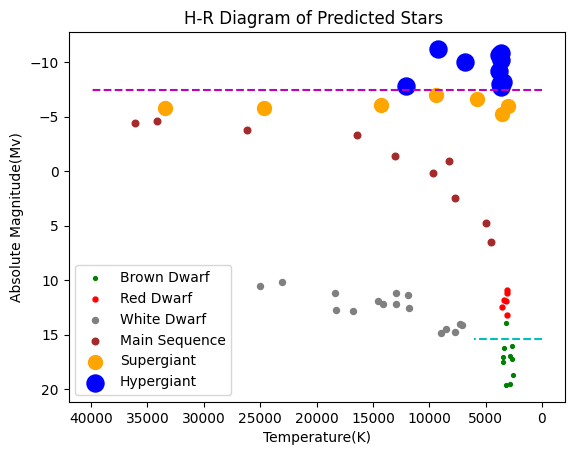

In [ ]:
c4 = 0
for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif np.array_equal(z[i],arr[1]):
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif np.array_equal(z[i],arr[2]):
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif np.array_equal(z[i],arr[3]):
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 90 , c = 'brown',marker = '.')
    elif np.array_equal(z[i],arr[4]):
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif np.array_equal(z[i],arr[5]):
        f = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')
    c4+=1

print("Total Predicted Stars = {}".format(c4))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Predicted Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
#print("Accuracy = {} %".format(val_acc*100))